In [116]:
#1. 제공해준 타이타닉 데이터에 대해 아래와 같은 작업을 수행하시오.
#==============================================================================
#1) Pclass를 원핫인코딩

import pandas as pd
import numpy as np

train=pd.read_csv('data/train.csv')

Pclass_ohe=pd.get_dummies(train.Pclass,prefix='Pclass')
train=pd.concat([train,Pclass_ohe],axis=1)

#==============================================================================
#2) Age를 이산화(5개 구간으로 나눔)

bins=np.linspace(train.Age.min(),train.Age.max(),5)
train['Age_5Class']=np.digitize(train.Age,bins)

#==============================================================================
#3) embarked를 원핫인코딩

Embarked_ohe=pd.get_dummies(train.Embarked,prefix='Embarked')
train=pd.concat([train,Embarked_ohe],axis=1)


In [133]:
# 2. 타이타닉호 승객을 사망자와 생존자 그룹으로 나누고 각 그룹에 대해 
# '미성년자', '청년', '중년', '장년', '노년' 승객의 비율을 구한다. 
# 각 그룹 별로 비율의 전체 합은 1이 되어야 한다.

bins = [5, 20, 30, 40, 60, 90]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

live=train[train.Survived==1] # 생존자 그룹
dead=train[train.Survived!=1] # 사망자 그룹

live_bin=pd.cut(x=live.Age,bins=bins,labels=labels)
dead_bin=pd.cut(x=dead.Age,bins=bins,labels=labels)

live_ratio=live_bin.value_counts()/live_bin.count()
dead_ratio=dead_bin.value_counts()/dead_bin.count()

1.0

In [66]:
#[기초 알고리즘]##############################################################
#문제 1. 길이가 10인 1-벡터를 만드세요.

vec1=np.ones(10)

# 문제 2.======================================================================
# 문제 1에서 만든 벡터에 대해 다섯번째 원소만 1이고 나머지 원소는 모두 0인
# 벡터를 만드세요.

vec1[:4]=0
vec1[5:]=0

# 문제 3.======================================================================
# 10 부터 20까지의 값을 가지는 벡터를 만드세요.

vec2=np.arange(10,21)

# 문제 4.======================================================================
# 위 벡터의 순서를 바꾸세요.

import random

random.shuffle(vec2)

# 문제 5.======================================================================
# 0부터 8까지의 값을 가지는 2x4 행렬을 만드세요.

arr1=np.arange(8).reshape(2,4)

# 문제 6.======================================================================
# 벡터 [1,2,0,0,4,0] 에서 원소의 값이 짝수인 원소만 선택한 벡터를 만드세요.

vec3=np.array([1,2,0,0,4,0])
vec4=vec3[vec3%2==0]

# 문제 7.======================================================================
# 2x2 단위 행렬(identity matrix)을 만드세요

arr2=np.eye(2)

# 문제 8.======================================================================
# 난수 원소를 가지는 3x3 행렬을 만드세요

arr3=np.array(random.sample(range(0,100),9)).reshape(3,3)

# 문제 9.======================================================================
# 위에서 만든 난수 행렬에서 최대값 / 최소값 원소를 찾으세요.

arr3.max()
arr3.min()

# 문제 10.=====================================================================
# 위에서 만든 난수 행렬에서 행 평균, 열 평균을 계산하세요.

arr3.mean(axis=0)
arr3.mean(axis=1)

array([42.33333333, 65.33333333, 21.66666667])

In [81]:
#[Microsoft R 서버를 활용한 빅데이터 분석]#####################################

import pandas as pd
import seaborn as sns
tips = sns.load_dataset("tips") 

#==============================================================================
# 1. 위 문장을 모두 수행한 후, 아래와 같은 요구사항을 구현하시오.

# 1) tips의 'sex‘ 컬럼의 타입을 문자열로 변환한 다음, info함수를 호출하여 
# 결과를 확인하시오.

tips['sex']=tips.sex.astype(str)
tips.info()

# =============================================================================
# 2) tips의 1,3,5,7번 index행에 저장된 tip 컬럼의 값을 모두 ‘missing'으로
# 변경하시오

tips[['smoker','day','time']]=tips[['smoker','day','time']].astype(str)
tips.iloc[[1,3,5,7],:]='missing'

#==============================================================================
# 3) scikitlearn에 있는 preprocessing 모듈중 표준화 및 정규화와 관련된 함수를
# 모두 기술하시오

# MinMaxScaler, RobustScaler, StandardScaler, Normalizer

#==============================================================================
# 2. 표준화와 정규화의 차이점을 설명하시오.

# 정규화 : 데이터의 스케일이 종속변수에 미치는 영향력을 크게 좌우하므로,
# 이를 방지하기 위해 모든 데이터를 0~1 사이의 값으로 변환하는 과정

# 표준화 : 각 데이터를 데이터셋의 평균을 기준으로 얼마나 떨어져 있는지를
# 나타내기 위해 평균을 0으로 해서 표준편차로 나눠주는 과정

#==============================================================================
# 3. 데이터 분석을 위해 필요로 하는 라이브러리 및 용도를 기술하시오.

# pandas & numpy : 데이터 병합, 계산 등 데이터 구조화, 연산에 필요
# sklearn.preprocessing : 정규화, 표준화 등 데이터 전처리 작업에 필요
# matplotlib, seaborn, missingno : 결측치 확인 및 분석 결과 시각화에 필요


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 8.8+ KB


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,missing,missing,missing,missing,missing,missing,missing
2,21.01,3.5,Male,No,Sun,Dinner,3
3,missing,missing,missing,missing,missing,missing,missing
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2,Female,Yes,Sat,Dinner,2
241,22.67,2,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [83]:
# [파이썬 기본문법과 통계기초]#################################################
# 다음 실행 예시처럼 교환할 돈을 입력받아서, 최소한의 동전의 개수로 교환해 주는
# 파이썬 코드를 작성하시오.
# 바꿀 돈 -->7777
# 500원: 15 , 100원: 2 , 50원: 1 , 10원 2 , 나머지: 7

def coins():
    ipt=int(input('교환할 금액을 입력하세요 : '))
    shr500,rest=divmod(ipt,500)
    shr100,rest=divmod(rest,100)
    shr50,rest=divmod(rest,50)
    shr10,rest=divmod(rest,10)
    print('500원 : %d, 100원 : %d, 50원 : %d, 10원 : %d, 나머지 : %d' %(shr500,shr100,shr50,shr10,rest))

coins()

교환할 금액을 입력하세요 : 7777
500원 : 15, 100원 : 2, 50원 : 1, 10원 : 2, 나머지 : 7


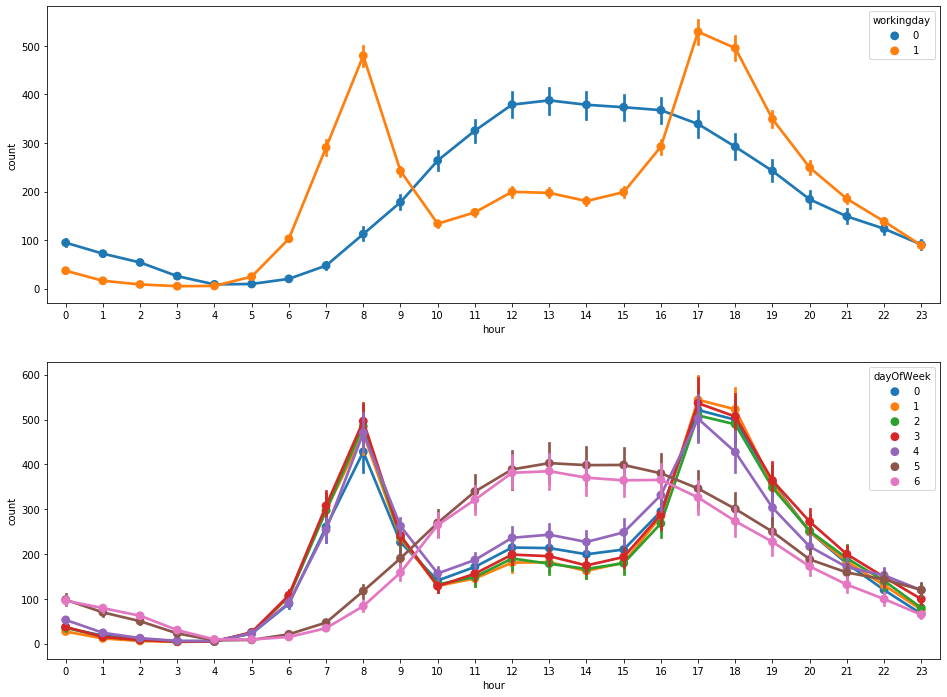

In [115]:
#[파이썬 패키지를 활용한 데이터 시각화]########################################
# bike sharing command 데이터를 불러온 후, workingday 및 dayofweek에 대한
# 시간대별 자전거 이용자 수(count)를 시각화하는 프로그램을 작성하시오.

import matplotlib.pyplot as plt
import seaborn as sns

bs=pd.read_csv('data/BikeSharing/train.csv')
bs['datetime']=pd.to_datetime(bs.datetime)
bs['dayOfWeek']=bs.datetime.dt.dayofweek
bs['hour']=bs.datetime.dt.hour

fig,axes=plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(16,12)
sns.pointplot(data=bs,ax=axes[0],x='hour',y='count',hue='workingday')
sns.pointplot(data=bs,ax=axes[1],x='hour',y='count',hue='dayOfWeek')